<a href="https://colab.research.google.com/github/Abinand-Shaji/Deep-Learning-Projects/blob/main/DL_project_Violence_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Real_life_violence_detection**

In [ ]:
!cp '/content/drive/MyDrive/Real_life_violence_dataset.zip' '/content/'

In [ ]:
!unzip '/content/Real_life_violence_dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Real _life_violence_dataset/Violence_frames/V_331.mp4_frame_10.jpg  
  inflating: Real _life_violence_dataset/Violence_frames/V_331.mp4_frame_50.jpg  
  inflating: Real _life_violence_dataset/Violence_frames/V_331.mp4_frame_120.jpg  
  inflating: Real _life_violence_dataset/Violence_frames/V_331.mp4_frame_130.jpg  
  inflating: Real _life_violence_dataset/Violence_frames/V_885.mp4_frame_50.jpg  
  inflating: Real _life_violence_dataset/Violence_frames/V_869.mp4_frame_0.jpg  
  inflating: Real _life_violence_dataset/Violence_frames/V_869.mp4_frame_40.jpg  
  inflating: Real _life_violence_dataset/Violence_frames/V_366.mp4_frame_40.jpg  
  inflating: Real _life_violence_dataset/Violence_frames/V_390.mp4_frame_80.jpg  
  inflating: Real _life_violence_dataset/Violence_frames/V_390.mp4_frame_140.jpg  
  inflating: Real _life_violence_dataset/Violence_frames/V_534.mp4_frame_80.jpg  
  inflating: Real _life_violence_dataset/Viol

**Importing Necessary Libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [ ]:
datasetpath = '/content/Real_life_violence_dataset'

In [ ]:
#define hyperparameter

epochs=10
image_size=(150,150)
batch_size=32

**Train Test Split**

In [ ]:
train_datagen=ImageDataGenerator(rescale=1.255,validation_split=0.2)

In [ ]:
training_generator=train_datagen.flow_from_directory(datasetpath,target_size=image_size,batch_size=batch_size,class_mode='binary',subset='training')

Found 23655 images belonging to 2 classes.


In [ ]:
validation_generator =train_datagen.flow_from_directory(datasetpath,target_size=image_size,batch_size=batch_size,class_mode='binary',subset='validation')

Found 5913 images belonging to 2 classes.


**Model Creation**

In [ ]:
model=Sequential()
#first convulutional Layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))

#pooling Layer
model.add(MaxPooling2D(2,2))

#another convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))

#another pooling layer
model.add(MaxPooling2D(2,2))

#fully connected Layers

model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

**Training**

In [ ]:
history=model.fit(training_generator,
                  steps_per_epoch=training_generator.samples // batch_size,
                  validation_data=validation_generator,
                  validation_steps=validation_generator.samples // batch_size,
                  epochs=epochs

                  )

Epoch 1/10
739/739 [==============================] - 95s 122ms/step - loss: 8.3015 - accuracy: 0.7152 - val_loss: 0.8285 - val_accuracy: 0.6248
Epoch 2/10
739/739 [==============================] - 83s 112ms/step - loss: 0.3463 - accuracy: 0.8194 - val_loss: 1.0035 - val_accuracy: 0.6617
Epoch 3/10
739/739 [==============================] - 82s 112ms/step - loss: 0.2567 - accuracy: 0.8816 - val_loss: 1.2703 - val_accuracy: 0.6924
Epoch 4/10
739/739 [==============================] - 90s 121ms/step - loss: 0.1727 - accuracy: 0.9290 - val_loss: 1.3579 - val_accuracy: 0.6870
Epoch 5/10
739/739 [==============================] - 88s 119ms/step - loss: 0.1495 - accuracy: 0.9418 - val_loss: 1.8831 - val_accuracy: 0.6909
Epoch 6/10
739/739 [==============================] - 87s 118ms/step - loss: 0.0900 - accuracy: 0.9649 - val_loss: 2.2170 - val_accuracy: 0.7196
Epoch 7/10
739/739 [==============================] - 89s 121ms/step - loss: 0.0695 - accuracy: 0.9746 - val_loss: 2.3825 - val_ac

**Visualization**

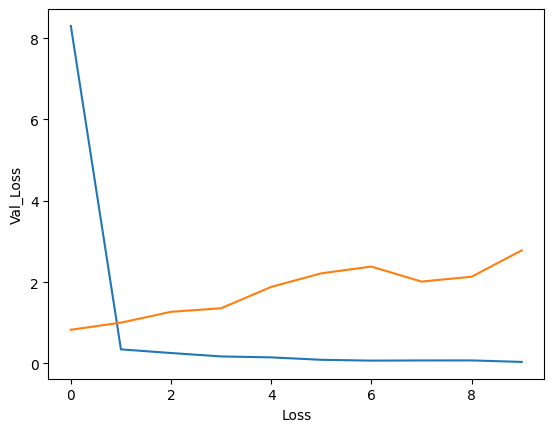

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Loss')
plt.ylabel('Val_Loss')
plt.show()

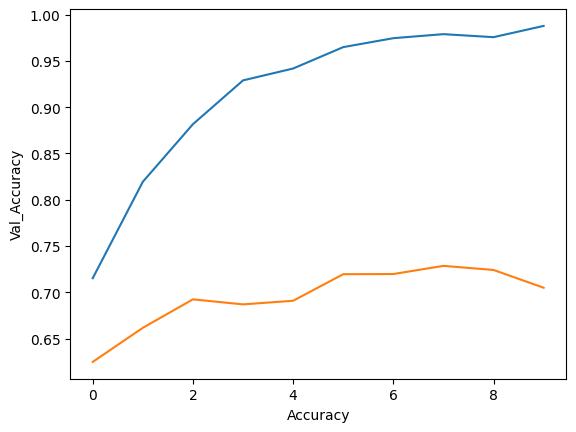

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Accuracy')
plt.ylabel('Val_Accuracy')
plt.show()

In [ ]:
#we can save oru predicted model into drive

model.save('Real_life_Violence_dataset.h5')

**Video Prediction**

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

In [ ]:
#Defined video path
video_path = '/content/wwe _violence.mp4'

#Defined modelpath and model
model_path = '/content/drive/MyDrive/Real_life_violence_dataset.h5'
model = load_model(model_path)

In [ ]:
#Created an empty list to store the frames.
frames = []

#Open the video file.
cap = cv2.VideoCapture(video_path)


#Looped through the video frames.
while cap.isOpened():
    ret, frame = cap.read()

    #checked if the frames are empty
    if not ret:
        break

    #Added frame to list
    frames.append(frame)

#released video capture
cap.release()


**Preprocessing each frames**

In [ ]:
# Resized frames to a consistent size
resized_frames = [cv2.resize(frame, (150, 150)) for frame in frames]

# Normalized pixel values between 0 and 1
normalized_frames = [frame / 255.0 for frame in resized_frames]

# Convert frames to NumPy array
preprocessed_frames = np.array(resized_frames)

In [ ]:
#Prediction
predictions = model.predict(preprocessed_frames)


#Interpret the predictions
if predictions[0] < 0.5:
    print(f"Video belongs to NonViolence category")
else:
  print(f"Video belongs to Violence category")
  from IPython.display import Javascript

  display(Javascript('alert("{}")'.format("Alert!! : Violence_detected!!!!")))



18/18 [==============================] - 0s 5ms/step
Video belongs to Violence category


<IPython.core.display.Javascript object>

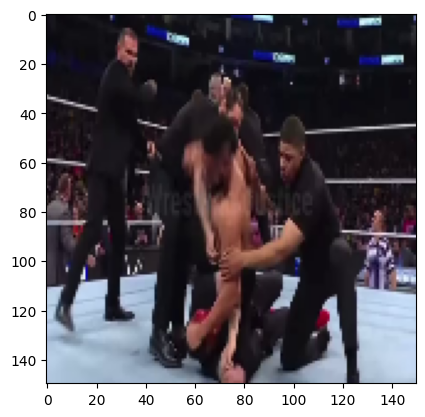

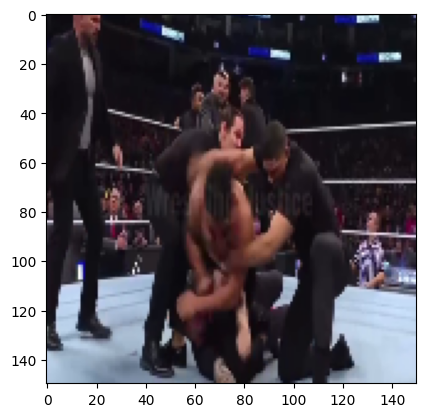

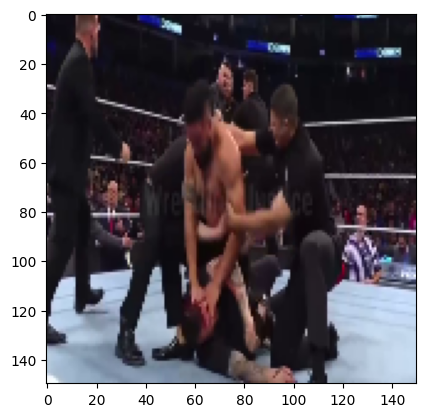

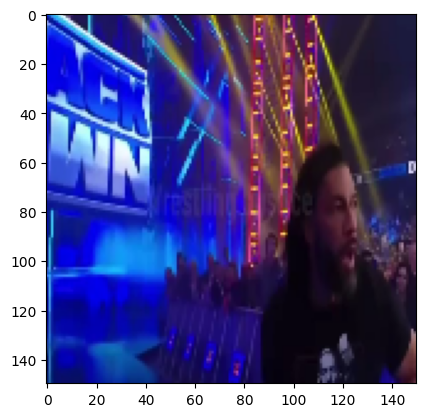

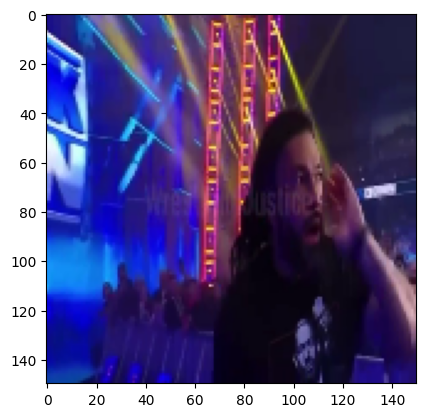

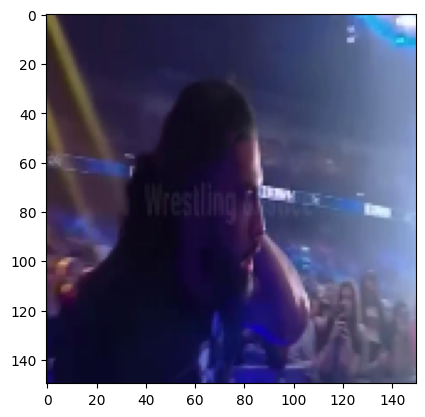

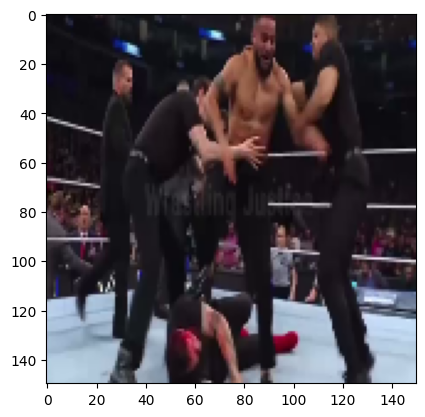

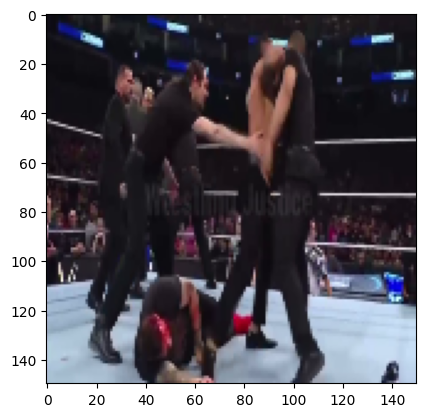

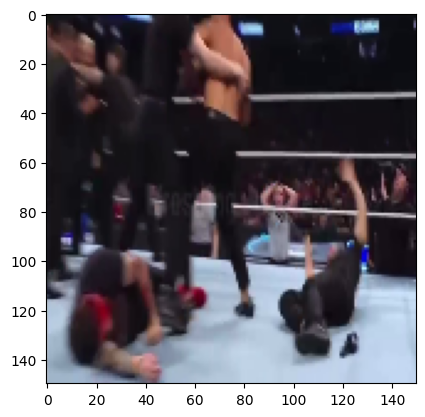

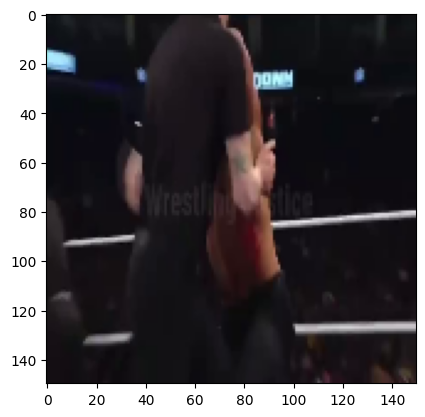

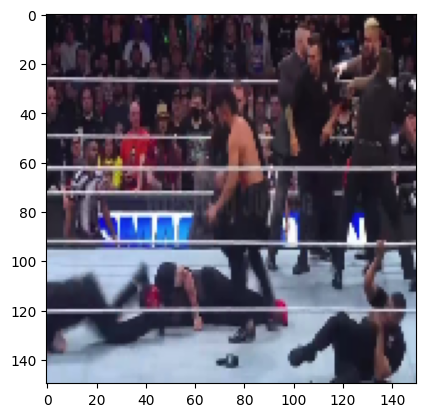

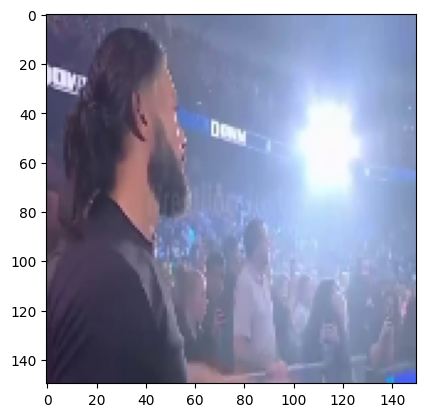

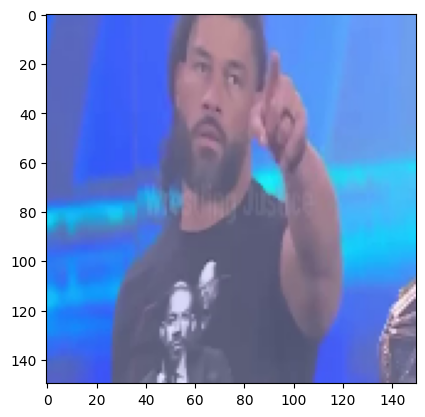

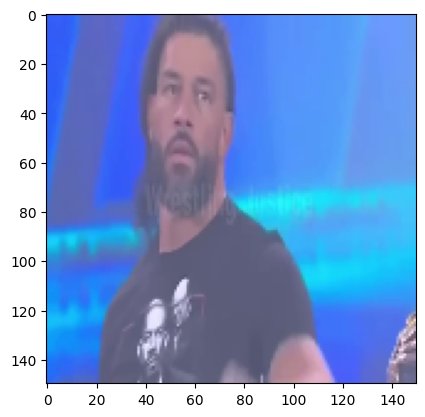

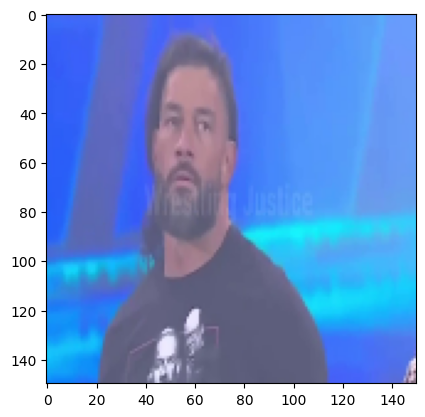

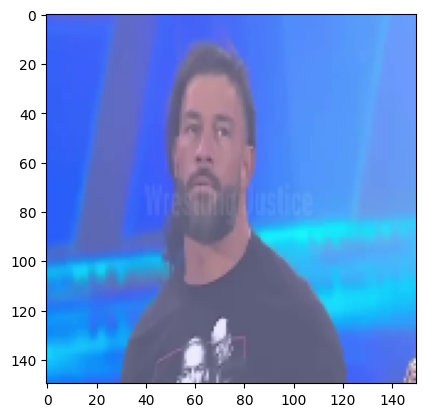

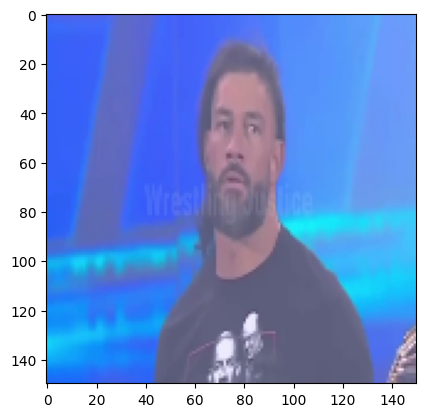

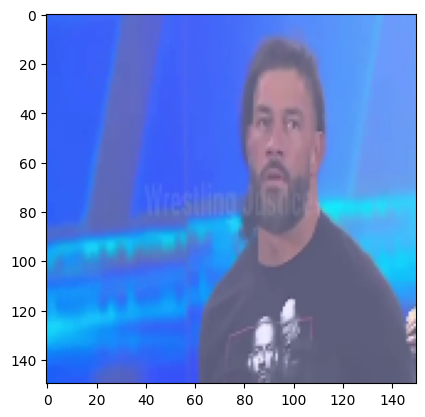

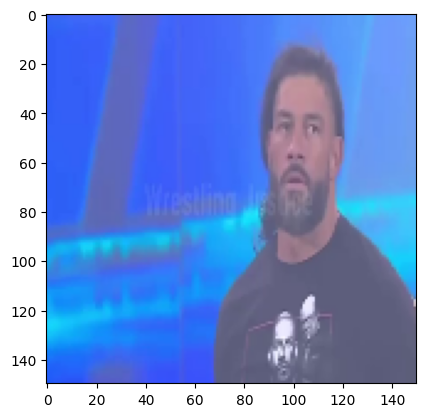

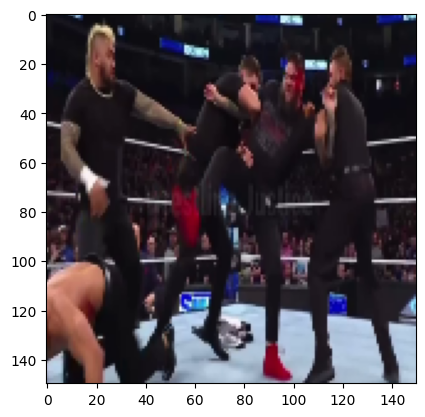

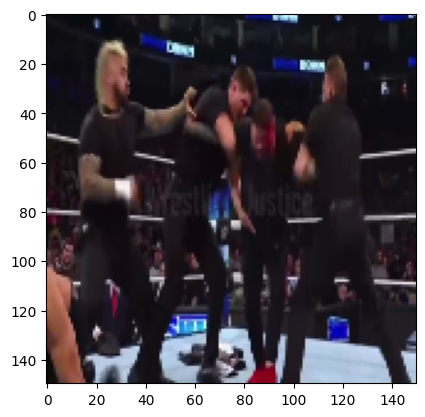

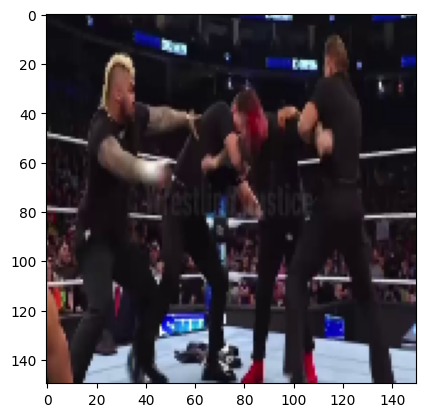

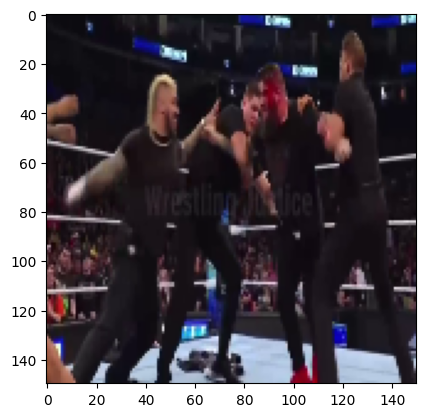

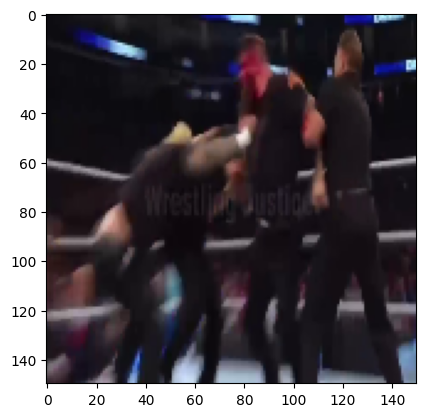

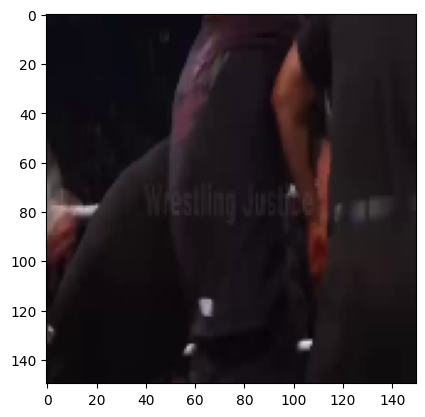

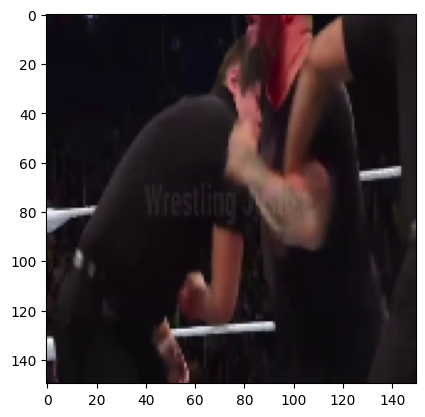

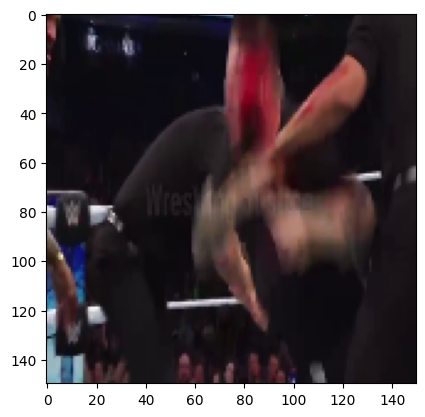

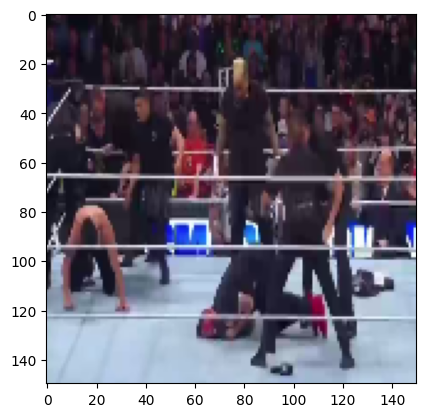

In [ ]:
import matplotlib.pyplot as plt

def show_frame(frame):

    # Converted the frame from BGR to RGB color space
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Displayed the frame using matplotlib
    plt.imshow(frame_rgb)
    plt.show()

for frame in preprocessed_frames[::20]:

    #To Display the frames
    show_frame(frame)

**Image Prediction**

In [ ]:
from tensorflow. keras.preprocessing import image
import numpy as np

def predict_image (image_path) :
  img = image.load_img(image_path,target_size=image_size)
  img = image.img_to_array(img)        # converting to array
  img = np.expand_dims(img,axis = 0)   # expanding dimensions to match model

  prediction = model.predict(img)

  picture=plt.imread(image_path)
  plt.imshow(picture)

  return  "Nonviolence" if prediction < 0.5 else "Violence"

1/1 [==============================] - 0s 28ms/step
Violence


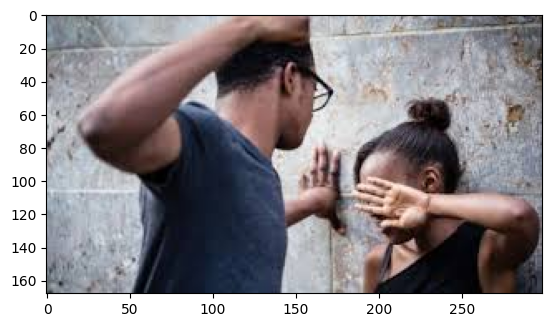

In [ ]:
output=predict_image('/content/violence_image.jpeg')
print(output)

1/1 [==============================] - 0s 18ms/step
Nonviolence


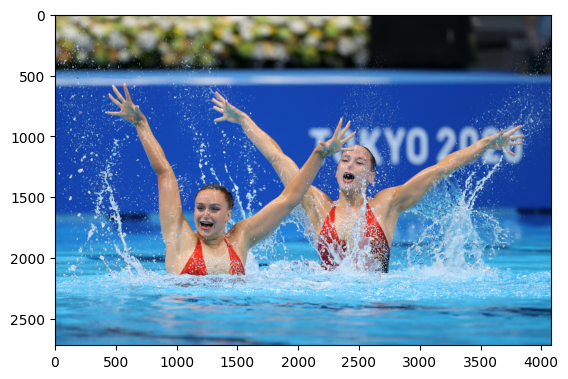

In [ ]:
output2=predict_image('/content/swimming.jpg')
print(output2)